# Projet Notations de films 

Dans le cadre du Projet Data Science nous avons choisi d'étudier l'appréciation des films par les spectateurs et la presse, à partir de leur notation.

problématique : Quelles caractéristiques des films font qu'ils sont les mieux notés ?
                Peut-on prévoir l'appréciation des films sans se baser sur le résumé ?
                Peut-on prévoir l'appréciation des films ?
                ................ ?

Le rapport se décompose de la manière suivante :   

I - Création de la base de données

1) Webscrapping du site Allocine

2) Traitement de la base et création de variables


II - Analyses descriptive des données

1) Analyses générales sur les notes attribuées aux films en fonction du genre du films

2) Analyses sur d'autres variables

3) Comparaison appréciation spectateurs vs presse

4) Analyses plus subtiles sur le genre et le budget


III - Modélisation

1) spectateurs : ? 

2) presse : clustering sur les films français CNC


### importation des librairies et fichiers

In [3]:
# Installation des packages nécessaires au projet            ATTENTION VOIR SI BESOIN D'AUTRES ?
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install lxml
!pip install aiohttp
!pip install nest_asyncio
!pip install unidecode

# Mettre dans un fichiers requirements

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


In [1]:
# Importation des librairies
import csv
import os

# 
import matplotlib.pyplot as plt
import asyncio
import aiohttp
import pandas as pd
from bs4 import BeautifulSoup
import re
import nest_asyncio


# Regression
import statsmodels.api as sm
from statsmodels.formula.api import rlm 

In [15]:
# Importation des fichiers python (contenant des fonctions) crées dans le cadre des 3 parties du projet :

for f in os.listdir('A_Base_de_données'):
    if f.endswith('.py'):
        module_name = os.path.splitext(f)[0]
        exec(f"from A_Base_de_données.{module_name} import *")


for f in os.listdir('B_Analyse_descriptive'):
    if f.endswith('.py'):
        module_name = os.path.splitext(f)[0]
        exec(f"from B_Analyse_descriptive.{module_name} import *")


for f in os.listdir('C_Modele'):
    if f.endswith('.py'):
        module_name = os.path.splitext(f)[0]
        exec(f"from C_Modele.{module_name} import *")


## I - Création de la base de données

### Webscrapping AlloCiné

In [5]:
# Récupération d'une liste de films qui possèdent tous une note moyenne de spectateur et une note moyenn de presse entre l'année .... et l'année .....



L'année en cours de WS est '2010'.


/opt/conda/lib/python3.12/site-packages/bs4/builder/__init__.py:295: RuntimeWarning: coroutine 'get_liens.<locals>.main' was never awaited
  def _replace_cdata_list_attribute_values(self, tag_name, attrs):


Avancement: 0.00%
Avancement: 4.86%
Avancement: 9.72%
Avancement: 14.57%
Avancement: 19.43%
Avancement: 24.29%
Avancement: 29.15%
Avancement: 34.01%
Avancement: 38.87%
Avancement: 43.72%
Avancement: 48.58%
Avancement: 53.44%
Avancement: 58.30%
Avancement: 63.16%
Avancement: 68.02%
Avancement: 72.87%
Avancement: 77.73%
Avancement: 82.59%
Avancement: 87.45%
Avancement: 92.31%
Avancement: 97.17%
Nombre de films trouvés 494.
Temps pris pour obtenir les caractéristiques des films pour l'année 2010: 60.80 secondes
L'année en cours de WS est '2011'.
Avancement: 0.00%
Avancement: 4.82%
Avancement: 9.63%
Avancement: 14.45%
Avancement: 19.27%
Avancement: 24.08%
Avancement: 28.90%
Avancement: 33.72%
Avancement: 38.54%
Avancement: 43.35%
Avancement: 48.17%
Avancement: 52.99%
Avancement: 57.80%
Avancement: 62.62%
Avancement: 67.44%
Avancement: 72.25%
Avancement: 77.07%
Avancement: 81.89%
Avancement: 86.71%
Avancement: 91.52%
Avancement: 96.34%
Nombre de films trouvés 519.
Temps pris pour obtenir le

AttributeError: 'NoneType' object has no attribute 'find_all'

In [6]:
# # Exportation en CSV => mettre en commentaire lors du rendu final afin que cela soit toujours le même CSV qui soit utilisé par la suite
# from pathlib import Path 
# filepath = Path('/home/onyxia/work/Projet_Cin-/A_Base_de_données/base_allociné_2010_2023.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# base_films_enrichie.to_csv(filepath)

In [4]:
# Lecture des bases CSV : 

# Base de films : contenant diverses caractéristiques sur les films
base_films = pd.read_csv('A_Base_de_données/base_films_2010_2023.csv')


# Base presse : contenant la note de chaque presse pour chaque film
presse = pd.read_csv('A_Base_de_données/presse_2010_2023.csv')


In [ ]:
# Lecture de la base CSV :


# # NOUVELLE VERSION - pour l'instant qu'une seule année
# base_films = pd.read_csv('A_Base_de_données/base_final_recompenses.csv')


### Traitement de la base et création de variables - VERSION DE SECOURS

Base presse

In [5]:
# Traduction des notes en numérique (Très bien => 4, etc)
presse_notes = equivalence_notes(presse)
presse_notes.head()

/home/onyxia/work/Projet_Cin-/A_Base_de_données/mise_en_forme.py:111: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  notes = dataframe.replace(equivalences)


,identifiant,L'Express,Télérama,Brazil,Les Fiches du Cinéma,Les Inrockuptibles,Le Figaroscope,Cahiers du Cinéma,Le Point,Bande à part,...,Libération,Slate,Voici,Studio Magazine,Studio Ciné Live,Dernières Nouvelles d'Alsace,Le Soir,L'Ecran Fantastique,Culturopoing.com,aVoir-aLire.com
0,173528,3,1,NaN,NaN,1,1.0,1,3,NaN,...,1,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
1,146632,2,2,3.0,NaN,1,5.0,1,4,NaN,...,1,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
2,133588,3,3,NaN,NaN,3,4.0,NaN,3,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132039,3,4,3.0,NaN,4,3.0,2,5,NaN,...,3,NaN,NaN,NaN,5,NaN,NaN,2.0,NaN,NaN
4,123534,5,3,4.0,NaN,NaN,4.0,NaN,3,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,4.0,NaN,NaN


In [6]:
presse

,identifiant,L'Express,Télérama,Brazil,Les Fiches du Cinéma,Les Inrockuptibles,Le Figaroscope,Cahiers du Cinéma,Le Point,Bande à part,...,Libération,Slate,Voici,Studio Magazine,Studio Ciné Live,Dernières Nouvelles d'Alsace,Le Soir,L'Ecran Fantastique,Culturopoing.com,aVoir-aLire.com
0,173528,Pas mal,Très mauvais,NaN,NaN,Très mauvais,Très mauvais,Très mauvais,Pas mal,NaN,...,Très mauvais,NaN,NaN,NaN,Pas terrible,NaN,NaN,NaN,NaN,NaN
1,146632,Pas terrible,Pas terrible,Pas mal,NaN,Très mauvais,Chef-d'oeuvre,Très mauvais,Très bien,NaN,...,Très mauvais,NaN,NaN,NaN,Chef-d'oeuvre,NaN,NaN,NaN,NaN,NaN
2,133588,Pas mal,Pas mal,NaN,NaN,Pas mal,Très bien,NaN,Pas mal,NaN,...,Pas terrible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132039,Pas mal,Très bien,Pas mal,NaN,Très bien,Pas mal,Pas terrible,Chef-d'oeuvre,NaN,...,Pas mal,NaN,NaN,NaN,Chef-d'oeuvre,NaN,NaN,Pas terrible,NaN,NaN
4,123534,Chef-d'oeuvre,Pas mal,Très bien,NaN,NaN,Très bien,NaN,Pas mal,NaN,...,NaN,NaN,NaN,NaN,Très bien,NaN,NaN,Très bien,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,311236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6680,310862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6681,312085,NaN,Pas mal,NaN,Pas mal,NaN,NaN,Très mauvais,NaN,NaN,...,Pas mal,NaN,NaN,NaN,NaN,Pas mal,NaN,NaN,NaN,Pas mal
6682,314000,NaN,Pas mal,NaN,Pas mal,Pas terrible,NaN,Pas terrible,NaN,NaN,...,Pas terrible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Très bien


base films

In [6]:
table_films = base_films

####### Nettoyage et mise en forme

# Conversion des notes en écriture décimale
table_films['spectateur'] = table_films['spectateur'].apply(mise_en_forme_decimale)
table_films['presse'] = table_films['presse'].apply(mise_en_forme_decimale)



####### Créations de variables

# Ajout du genre des réalisateurs (en se basant sur une base de plus de 11 627 prénoms de plusieurs pays dont le genre est mentionné)
table_films = get_genre_individuel(table_films, 'auteur')

# Différence de notation entre spectateur et presse
table_films['diff_notation'] = table_films['spectateur']-table_films['presse']

# Année du film
table_films = get_annee(table_films, 'date')

# Durée du film en minutes
table_films['durée'] = table_films['durée'].astype('string')
table_films['duree_min'] = table_films['durée'].apply(duree_en_minutes)

# Catégorisation de la durée des films
table_films = categorisation_duree(table_films, 'duree_min')
len(table_films)

6684

La table finale des films contient les colonnes suivantes : 'genre_ind', 'titre', 'identifiant', 'date', 'durée', 'auteur',
       'spectateur', 'presse', 'genre1', 'genre2', 'genre3', 'release',
       'nationalite', 'date_sortie_dvd', 'date_sortie_bluray',
       'date_sortie_vod', 'type_film', 'budget', 'langues',
       'format_production', 'couleur', 'format_audio', 'format_projection',
       'num_visa', 'diff_notation', 'annee', 'duree_min', 'duree_cat'

### Traitement de la base et création de variables - NOUVEAU (base contient qu'une année pour l'instant)

In [ ]:
# table_films = base_films

# ####### Nettoyage et mise en forme

# # Conversion des notes en écriture décimale
# table_films['spectators_rating'] = table_films['spectators_rating'].apply(mise_en_forme_decimale)
# table_films['press_rating'] = table_films['press_rating'].apply(mise_en_forme_decimale)



# ####### Créations de variables

# # Ajout du genre des réalisateurs (en se basant sur une base de plus de 11 627 prénoms de plusieurs pays dont le genre est mentionné)
# table_films = get_genre_individuel(table_films, 'director')

# # Différence de notation entre spectateur et presse
# table_films['diff_notation'] = table_films['spectators_rating']-table_films['press_rating']

# # Année du film
# # table_films = get_annee(table_films, 'date')

# # Durée du film en minutes
# table_films['duration'] = table_films['duration'].astype('string')
# table_films['duration_min'] = table_films['duration'].apply(duree_en_minutes)

# # Catégorisation de la durée des films
# table_films = categorisation_duree(table_films, 'duration_min')
# len(table_films)

# Formatage des récompenses et nominations
# A FAIRE


## II -  Analyses descriptives

### 1) Analyses descriptives générales des notes des spectateurs en fonction du genre du film

Nous avons à notre disposition une base de **6684** films issus d'Allocinés. Avec pour chaque film la **note moyenne** attribuée par les **spectateurs** ainsi que la note moyenne attribuée par **la presse**. Les notes vont de **1 à 5**.

1) Dans un premier temps, nous pouvons regarder quels sont les types de films les plus appréciés en moyenne par les spectateurs : 

In [7]:
# (A noter que les genres dont nous possédons moins de 30 films ne sont pas pris en compte).
classement_genres_preferes(table_films, 'spectateur')

,Note_Moyenne,Nombre_de_Films
genre,,
Biopic,3.484758,269
Animation,3.340341,352
Aventure,3.213265,392
Drame,3.183932,2533
Policier,3.135354,198
Comédie dramatique,3.082310,407
Science Fiction,3.045161,31
Action,3.044745,628
Thriller,2.951020,147


Les films **Biopic**, d'**Animation** et d'**Aventure** semblent être les plus appréciés par les spectateurs. Tandis que les films de **Comédie**, **Fantastique** ou encore d'**Epouvante-horreur** semblent relativement moins appréciés. 

A noter que les effectifs au sein de chaque genre de films peuvent être assez variables (allant de 31 avec la Science Fiction à plus de 2533 pour les Drames). De ce fait, il peut être intéressant de comparer de manière plus précise les **notes moyennes** attribuées par les **spectateurs** afin de voir si les différences dans la **notation des spectateurs** en fonction du **genre de film** sont significatives ou pas. 

Pour cela, nous pouvons regarder la distribution des notes à l'aide d'un **histogramme**, et réaliser un test **ANOVA** sur les différents groupes. Cette méthode statistique permet de déterminer si au moins une des moyennes parmi les groupes étudiés est significativement différente des autres, en tenant compte de la variabilité au sein et entre les groupes.

Dropdown(description='Genre 1 :', index=12, options=('Drame', 'Comédie', 'Action', 'Comédie dramatique', 'Aven…

Dropdown(description='Genre 2 :', index=12, options=('Drame', 'Comédie', 'Action', 'Comédie dramatique', 'Aven…

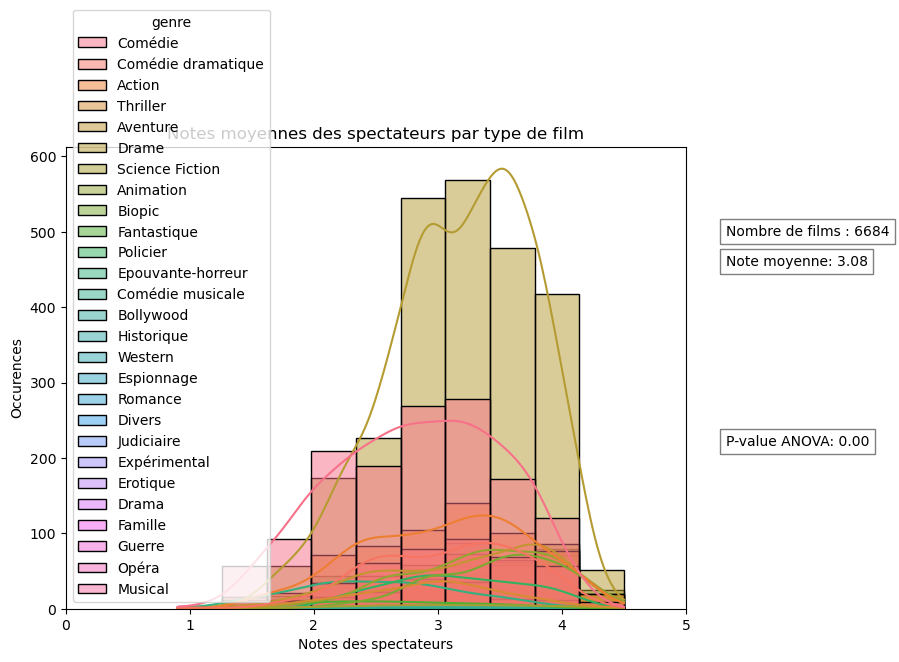

In [8]:
# Histogrammes de la distribution des notes attribuées par les spectateurs en fonction du genre du film
# => Les menus déroulants permettent de sélectionner différents genres à comparer 
# => Les genres dont nous possédons moins de 30 films ne sont pas pris en compte)                         !!!!!!!!!!!!!!!!!!!!!!!!!! COUPER A 50 ?

graphique_genre_film(table_films)  

COMMENTAIRES A REFAIRE QUAND IL Y A AURA LA BASE <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Une p-value du test d'ANOVA très faible (inférieure aux seuils usuels, et notamment de 5%), indique que la différence de notation des spectateurs entre les genres de films peut être considérée comme significative. En étudiant les différentes distributions de notes en fonction des genres ainsi que les tests ANOVA associés, nous pouvons remarquer les points suivants :


- L'ANOVA sur tous les types de films montre qu'il existe bien des **différences significatives** au sein des groupes (au moins un groupe se distingue des autres), cependant cela ne donne aucune information sur quels sont les groupes statistiquement significatifs. Pour cela, nous pouvons par exemple les comparer deux par deux. 


- Pour certains genres de films qui étaient très proche dans le classement, leur p-value montrent que les différences de notations ne sont pas très significatives (Tels que Policier et Comédie Dramatique avec 0,30), voir même pas du tout significatives (avec des valeurs de p-value supérieures à 0,7, voir proche de 1 (SF et Comédie dramatique, SF et Actions, etc))

- Mais certains genres qui étaient très proches au niveau de la notation moyenne, se retrouvent en fait à avoir des différences de notation qui peuvent être considérées comme statistiquement significatives. C'est notamment le cas du genre **Animation** et **Aventure**, respectivement aux deuxième et troisième places sont significatives au seuil de 10 et 5%.

- Bien sûr, comme attendu, nous remarquons que plus les 2 genres considérés sont éloignés dans le classement, plus la p-value est significative. 

Les diverses ANOVA réalisées laissent supposer que le type de films semblerait avoir une influence sur la note attribuée par les spectateurs.

### 2) D'autres caractéristiques pourraient-elles avoir une influence sur l'appréciation attribuée par les spectateurs ?

De manière similaire à précédemment nous pouvons effectuer un test **ANOVA** sur le **genre du réalisateur** afin de voir s'il existe une différence significative dans les notes moyennes attribuées aux films réalisés par des femmes et aux films réalisés par des hommes.

In [11]:
p_value_anova_h_vs_f(table_films)

'P-value du test ANOVA: 0.196'

Avec une p-value bien supérieure aux seuils habituels de 1, 5 et 10%, nous pouvons dire qu'il ne semble **pas** y avoir de **différence** statistiquement significative entre les notes attribuées par les spectateurs pour des films réalisés par des femmes et des films réalisés par des hommes. 

Nous pouvons aussi nous pencher sur la durée des films, en traçant le boxpolt des notes en fonction de la durée des films (durée qui a été discrétisée en intervalle de 10 minutes) : 

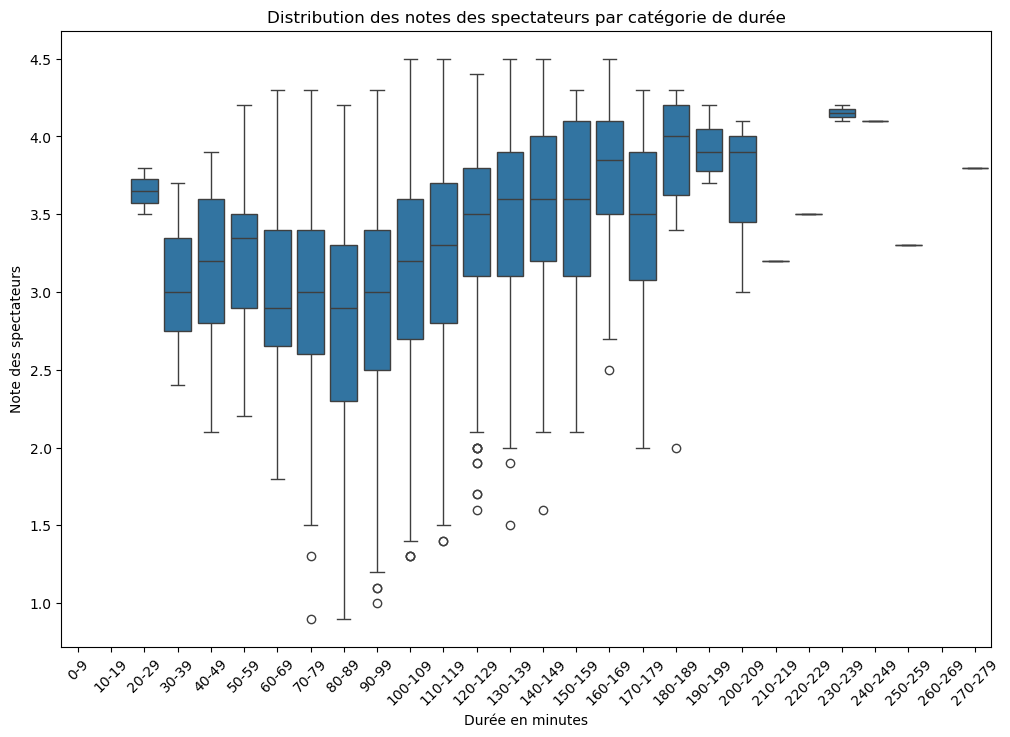

In [12]:
boxplot_duree(table_films, 'duree_cat')

COMMENTAIRES A FINIR <<<<<<<<<<<<<<<>>>>>>>>>>>>>>>

Ajouter une petite visualisation en fonction du nombre de nomination ? OUI DES QU'ON AURA LA BASE !!!!!!!!!!!!!!!!!!!!! <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

### 3) Les préférences des spectateurs sont-elles similaires à celles de la presse ?

Nous avons précédemment regardé le classement des genres de films les plus appréciés par les spectateurs. Comparons maintenant ce classement à celui de la presse :

In [13]:
comparaison_preferences(table_films)

,Note_Moyenne,Nombre_de_Films
genre,,
Biopic,3.484758,269
Animation,3.340341,352
Aventure,3.213265,392
Drame,3.183932,2533
Policier,3.135354,198
Comédie dramatique,3.082310,407
Science Fiction,3.045161,31
Action,3.044745,628
Thriller,2.951020,147


Le classement se ressemble avec un même quatuor en tête, et même genres de films en queue de classement. 
Cependant les notes moyennes des spectateurs semblent tenir globalement sur un intervalle plus large que celui de la presse.

Dropdown(description='Genre :', index=12, options=('Drame', 'Comédie', 'Action', 'Comédie dramatique', 'Aventu…

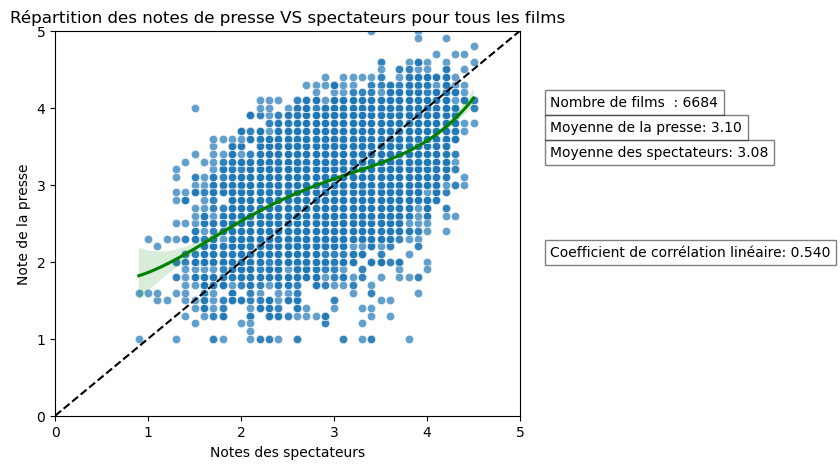

In [14]:
# Nuage de points pour voir les différences de notations entre la presse et les spectateurs
# => 
# => explique rapide le polynôme vert ---------------------------
# =>
graphique_presse_vs_spect(table_films) 

COMMENTAIRES A FAIRE QUAND IL Y AURA LA BASE <<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Afin d'avoir une analyse plus fine, notamment en terme de budget alloué au film ainsi que le genre du/des réalisateurs nous pouvons agréger à nos films, la base française CNC. Nous perdrons un certains nombre de films, mais en contrepartie cela nous permet d'avoir des variables plus précises pour certaines caractéristiques.

### 4) Le budget alloué et le genre des réalisateurs peuvent-ils influer sur les notes attribuées par la presse et les spectateurs ? (périmètre d'étude réduit aux films français de la base CNC)

### Base CNC : Analyse du type de devis, obtenus par les réalisateurs vs les réalisatrices

Une base du CNC nous donne ce type d'information : les sociétés productrices et distributrices des films, chaînes de télévision partenaires en préachat. Je veux étudier les différences de montant des devis selon le genre du réalisateur.


In [15]:
#Ici, j'importe les données du CNC en utilisant un API.
import requests
import pandas as pd
api_root = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/cnc-production-cinematographique-liste-des-films-agrees/exports/json?limit=-1"
response = requests.get(api_root)
films_cnc_brut = response.json() #je mets tout dans un dico json
print(response.content[:1000])

films_cnc = pd.json_normalize(films_cnc_brut) 
#films_cnc = films_cnc.set_index('visa')

b'[{"visa": "117042", "titre": "BYE BYE BLONDIE", "realisateur": "DESPENTES Virginie", "producteurs": "MASTER MOVIES / RED STAR CINEMA / WILD BUNCH", "devis": 4103906.0, "genre": "Fiction", "eof": null, "rang": "2", "asr": "avant", "payante": null, "clair": null, "nationalite": ["France", "Belgique", "Suisse"], "date": "2010", "decomposition": "France-65 / Belgique-21 / Suisse-14", "aides": ["Sofica"]},{"visa": "127028", "titre": "DE L\'HUILE SUR LE FEU", "realisateur": "BENAMOU Nicolas", "producteurs": "AXEL FILMS / RECIFILMS / SARL PASTRAMI CORP / TF1 DROITS AUDIOVISUELS / UGC IMAGES", "devis": 3320336.0, "genre": "Fiction", "eof": null, "rang": "1", "asr": null, "payante": null, "clair": null, "nationalite": ["France"], "date": "2010", "decomposition": "France-100", "aides": ["Sofica", "Cr\\u00e9dit D\'impot"]},{"visa": "124421", "titre": "DES JEUNES GENS MODERNES", "realisateur": "DE MISSOLZ J\\u00e9r\\u00f4me", "producteurs": "ARTE FRANCE CINEMA / LOVE STREAMS AGNES B. PRODUCTIONS

In [16]:
# Categorisation des films en fonction du devis
films_cnc = categorisation_devis(films_cnc)


# Ajout d'une variable de genres : si il y a plusieurs réalisateurs => on indiquera si il y a au moins une femme
# Cela prend un peu de temps car cela se fait ligne par ligne.... (pour que cela plus rapide, peut-être merger avec la base initiale d'abord)
films_cnc = ajout_genre_multiple(films_cnc, 'realisateur')


In [17]:
films_cnc.head()

,visa,titre,realisateur,producteurs,devis,genre,eof,rang,asr,payante,clair,nationalite,date,decomposition,aides,type_de_devis,genre_ind
0,117042,BYE BYE BLONDIE,[DESPENTES Virginie],MASTER MOVIES / RED STAR CINEMA / WILD BUNCH,4103906.0,Fiction,None,2,avant,None,None,"[France, Belgique, Suisse]",2010,France-65 / Belgique-21 / Suisse-14,[Sofica],entre 4 et 7 m,f
1,127028,DE L'HUILE SUR LE FEU,[BENAMOU Nicolas],AXEL FILMS / RECIFILMS / SARL PASTRAMI CORP / ...,3320336.0,Fiction,None,1,None,None,None,[France],2010,France-100,"[Sofica, Crédit D'impot]",entre 2 et 4 m,m
2,124421,DES JEUNES GENS MODERNES,[DE MISSOLZ Jérôme],ARTE FRANCE CINEMA / LOVE STREAMS AGNES B. PRO...,815248.0,Documentaire,None,2,None,None,None,[France],2010,France-100,[Crédit D'impot],<2 m,m
3,123383,EXERCICE DE L'ETAT (L'),[SCHOELLER Pierre],ARCHIPEL 35 / FRANCE 3 CINEMA,6548121.0,Fiction,None,3,avant,None,None,"[France, Belgique]",2010,France-80 / Belgique-20,"[Sofica, Crédit D'impot]",entre 4 et 7 m,m
4,124350,MA PART DU GATEAU,[KLAPISCH Cédric],CE QUI ME MEUT - MOTION PICTURES / FRANCE 2 CI...,7885486.0,Fiction,None,3,None,None,None,[France],2010,France-100,"[Sofica, Crédit D'impot, Aide Régionale]",> à 7 m,m


In [18]:
len(films_cnc)

4620

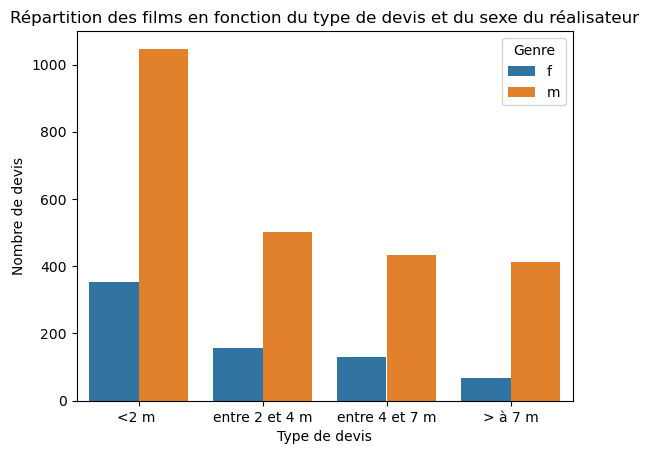

In [13]:

# Filtrer les données pour les modalités 'f' et 'm' de 'genre_ind'
films_cnc_filtered = films_cnc[films_cnc['genre_ind'].isin(['f', 'm'])]

# Créer le barplot avec seaborn
sns.countplot(data=films_cnc_filtered, x='type_de_devis', hue='genre_ind', dodge=True)

# Ajouter des titres et des labels
plt.title('Répartition des films en fonction du type de devis et du sexe du réalisateur')
plt.xlabel('Type de devis')
plt.ylabel('Nombre de devis')
plt.legend(title='Genre')

# Afficher le plot
plt.show()

/tmp/ipykernel_33974/3562478981.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = films_cnc_filtered.groupby(['type_de_devis', 'genre_ind']).size().unstack().fillna(0)


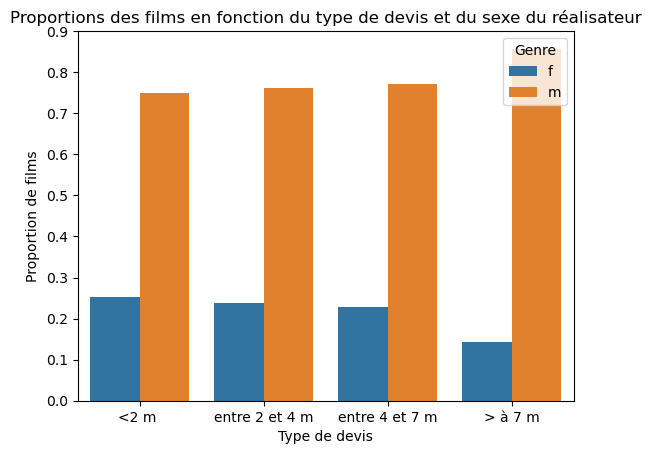

In [30]:

# Filtrer les données pour les modalités 'f' et 'm' de 'genre_ind'
films_cnc_filtered = films_cnc[films_cnc['genre_ind'].isin(['f', 'm'])]

# Calculer les proportions pour chaque catégorie de type_de_devis et genre_ind
proportions = films_cnc_filtered.groupby(['type_de_devis', 'genre_ind']).size().unstack().fillna(0)
proportions = proportions.div(proportions.sum(axis=1), axis=0)  # Normaliser par ligne (type_de_devis)

# Réorganiser les données pour un plot avec seaborn
proportions = proportions.reset_index().melt(id_vars=['type_de_devis'], value_name='Proportion')

# Créer le barplot avec seaborn
sns.barplot(data=proportions, x='type_de_devis', y='Proportion', hue='genre_ind')

# Ajouter des titres et des labels
plt.title('Proportions des films en fonction du type de devis et du sexe du réalisateur')
plt.xlabel('Type de devis')
plt.ylabel('Proportion de films')
plt.legend(title='Genre')

# Afficher le plot
plt.show()


### Fusion base CNC et base allociné

In [32]:
base_allocine = base_films.drop(columns=['titre'])
base_cnc_agregee = pd.merge(films_cnc, base_allocine,left_on='visa', right_on='num_visa', how='inner')
len(base_cnc_agregee)
base_cnc_agregee

,visa,titre,realisateur,producteurs,devis,genre,eof,rang,asr,payante,...,date_sortie_bluray,date_sortie_vod,type_film,budget,langues,format_production,couleur,format_audio,format_projection,num_visa
0,117042,BYE BYE BLONDIE,[DESPENTES Virginie],MASTER MOVIES / RED STAR CINEMA / WILD BUNCH,4103906.0,Fiction,None,2,avant,None,...,-,21/07/2012,Long métrage,4 500 000 EUR,Français,"35mm, Super 8",Couleur,Dolby Digital,1.85 : 1,117042
1,127028,DE L'HUILE SUR LE FEU,[BENAMOU Nicolas],AXEL FILMS / RECIFILMS / SARL PASTRAMI CORP / ...,3320336.0,Fiction,None,1,None,None,...,-,31/03/2017,Long métrage,-,Français,-,Couleur,-,-,127028
2,123383,EXERCICE DE L'ETAT (L'),[SCHOELLER Pierre],ARCHIPEL 35 / FRANCE 3 CINEMA,6548121.0,Fiction,None,3,avant,None,...,01/03/2012,30/06/2015,Long métrage,-,Français,35mm,Couleur,Dolby SRD,2.35 : 1 Cinemascope,123383
3,124350,MA PART DU GATEAU,[KLAPISCH Cédric],CE QUI ME MEUT - MOTION PICTURES / FRANCE 2 CI...,7885486.0,Fiction,None,3,None,None,...,-,16/07/2011,Long métrage,9 000 000 USD,Français,-,Couleur,-,-,124350
4,122385,MARQUIS (LE),[FARRUGIA Dominique],FARRUDG ENTERTAINMENT WORLDWIDE / PATHE PRODUC...,8880926.0,Fiction,None,3,None,None,...,20/07/2011,21/10/2015,Long métrage,-,Français,-,Couleur,-,-,122385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,149721,Sic transit Gloria Mundi,[GUEDIGUIAN Robert],EX NIHILO,4103087.0,Fiction,OUI,3,None,"[C+, Ciné+]",...,02/06/2020,01/04/2020,Long métrage,-,Français,-,Couleur,-,-,149721
2160,151502,Tlamess,[EDDINE SLIM Ala],STILL MOVING,788017.0,Fiction,NON,3,None,None,...,-,18/05/2020,Long métrage,-,ARABIC,-,Couleur,-,-,151502
2161,141793,D'une pierre deux coups,[DELIBA Fejria],CINE SUD PROMOTION,1219623.0,Fiction,None,1,avant,None,...,-,19/08/2016,Long métrage,-,Français,-,Couleur,-,-,141793
2162,138716,Irremplaçable,[LILTI Thomas],31 JUIN FILMS / FRANCE 2 CINEMA / LES FILMS DU...,5345262.0,Fiction,None,3,None,"[C+, Ciné+]",...,27/07/2016,23/07/2016,Long métrage,-,Français,-,Couleur,-,-,138716


In [25]:
# Conversion des notes en écriture décimale
base_cnc_agregee['spectateur'] = base_cnc_agregee['spectateur'].apply(mise_en_forme_decimale)
base_cnc_agregee['presse'] = base_cnc_agregee['presse'].apply(mise_en_forme_decimale)


In [34]:
base_cnc_agregee.columns

Index(['visa', 'titre', 'realisateur', 'producteurs', 'devis', 'genre', 'eof',
       'rang', 'asr', 'payante', 'clair', 'nationalite_x', 'date_x',
       'decomposition', 'aides', 'type_de_devis', 'genre_ind', 'identifiant',
       'date_y', 'durée', 'auteur', 'spectateur', 'presse', 'genre1', 'genre2',
       'genre3', 'release', 'nationalite_y', 'date_sortie_dvd',
       'date_sortie_bluray', 'date_sortie_vod', 'type_film', 'budget',
       'langues', 'format_production', 'couleur', 'format_audio',
       'format_projection', 'num_visa'],
      dtype='object')

In [26]:
print(base_cnc_agregee[['presse', 'spectateur']].dtypes)

presse        float64
spectateur    float64
dtype: object


In [ ]:
#Comparaison avis spectateurs vs presse selon le type de devis
base_cnc_agregee_moyennes = base_cnc_agregee.groupby("type_de_devis").agg(
    presse=("presse", "mean"),
    spectateur=("spectateur", "mean")
).reset_index()
base_cnc_agregee_moyennes

/tmp/ipykernel_33974/3371334474.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base_cnc_agregee_moyennes = base_cnc_agregee.groupby("type_de_devis").agg(


,type_de_devis,presse,spectateur
0,<2 m,3.102651,2.873373
1,entre 2 et 4 m,3.224544,2.922110
2,entre 4 et 7 m,3.138614,3.004950
3,> à 7 m,2.950435,2.901159


In [29]:
#Comparaison avis spectateurs vs presse selon le type de devis et le genre
base_cnc_agregee_moyennes = base_cnc_agregee.groupby(
    ["type_de_devis", "genre_ind"]
).agg(
    presse=("presse", "mean"),
    spectateur=("spectateur", "mean")
).reset_index()
base_cnc_agregee_moyennes

/tmp/ipykernel_33974/2817364670.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base_cnc_agregee_moyennes = base_cnc_agregee.groupby(


,type_de_devis,genre_ind,presse,spectateur
0,<2 m,f,3.071831,2.746479
1,<2 m,"f,m",2.984615,2.753846
2,<2 m,f_coréalisé,3.357143,3.107143
3,<2 m,m,3.100930,2.854651
4,<2 m,"m,f",3.050000,2.925000
5,<2 m,m_coréalisé,3.092500,2.927500
6,<2 m,non trouvé,3.125698,2.993855
7,entre 2 et 4 m,f,3.179310,2.779310
8,entre 2 et 4 m,"f,m",3.340000,2.780000
9,entre 2 et 4 m,f_coréalisé,3.231579,2.910526


Le résultat des notes n'est pas incroyable. En tout cas, elles ne semblent rien dire sur une réception différenciée des films réalisés par des femmes, par opposition à des films réalisés par des hommes... Ainsi peut-on conclure que la critique n'est pas sexiste ?

In [38]:
base_cnc_agregee_f = base_cnc_agregee.query("genre_ind == 'f'")
base_cnc_agregee_f

,visa,titre,realisateur,producteurs,devis,genre,eof,rang,asr,payante,...,date_sortie_bluray,date_sortie_vod,type_film,budget,langues,format_production,couleur,format_audio,format_projection,num_visa
0,117042,BYE BYE BLONDIE,[DESPENTES Virginie],MASTER MOVIES / RED STAR CINEMA / WILD BUNCH,4103906.0,Fiction,None,2,avant,None,...,-,21/07/2012,Long métrage,4 500 000 EUR,Français,"35mm, Super 8",Couleur,Dolby Digital,1.85 : 1,117042
22,149287,Une fille facile,[ZLOTOWSKI Rebecca],LES FILMS VELVET,2684638.0,Fiction,OUI,3,None,[C+],...,21/01/2020,14/01/2020,Long métrage,-,Français,-,Couleur,-,-,149287
28,142598,Moutonnière (La),[DJAMA Sofia],LIAISON CINEMATOGRAPHIQUE,1152380.0,Fiction,OUI,1,avant,[Ciné+],...,-,24/04/2018,Long métrage,-,ARABIC,-,Couleur,-,-,142598
33,133830,ABUS DE FAIBLESSE,[BREILLAT Catherine],ARTE FRANCE CINEMA / CB FILMS / FLACH FILM / F...,3984660.0,Fiction,None,3,avant,None,...,-,03/09/2014,Long métrage,-,Français,-,Couleur,-,-,133830
39,131183,DARK TOUCH,[DE VAN Marina],EX NIHILO,2729542.0,Fiction,None,3,None,None,...,-,01/03/2020,Long métrage,2 729 542 EUR,Anglais,-,Couleur,-,-,131183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,151976,A la folie,[ESTROUGO Audrey],DAMNED FILMS,148741.0,Fiction,OUI,3,après,None,...,-,06/08/2022,Long métrage,-,Français,-,Couleur,-,-,151976
2147,152335,Amours d'Anaïs (Les),[BOURGEOIS-TACQUET Charline],LFP - LES FILMS PELLÉAS,3098451.0,Fiction,OUI,1,avant,"[C+, Ciné+]",...,-,13/12/2021,Long métrage,-,Français,-,Couleur,-,-,152335
2153,153199,Portrait d'une jeune fille qui va bien,[KIBERLAIN Sandrine],CURIOSA FILMS / E.D.I FILMS,3732502.0,Fiction,OUI,1,None,"[C+, Ciné+]",...,07/06/2022,06/06/2022,Long métrage,-,Français,-,Couleur,-,-,153199
2157,151526,Parent d'élève,[SAGLIO Noémie],RECTANGLE PRODUCTIONS,4625760.0,Fiction,OUI,3,None,"[C+, Ciné+]",...,-,10/02/2021,Long métrage,-,Français,-,Couleur,-,-,151526


In [44]:
#Je regarde la différence de notation selon le genre du film, le genre du réal

classement_genres_preferes(base_cnc_agregee_f, 'spectateur')

ValueError: Grouper for 'genre' not 1-dimensional

In [45]:
presse.head()
base_cnc_agregee_presse = pd.merge(base_cnc_agregee, presse,left_on='identifiant', right_on='identifiant', how='inner')

## III - Modelisation

### 1) Spectateurs
La première analyse descriptive montre que l'ont distingue différents facteurs qui pourraient expliquer des différentes notes attribuées par les spectateurs => modèle qui essaie de prédire/expliquer la note en se bassant sur divers critère : 
- genre
- durée
- ...

### 2) Presse (clustering)
Concernant la presse, et au vue des résultats nous pouvons nous demander si on ne pourrait pas identifier des groupe de presse en fonction de leur notes attribuées en fonction des films.


In [27]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
 
# Mise en forme de la table utile - A CHANGER QUAND ON AURA LA BASE FINALE
table_cluster = get_table_cluster(table_films, presse_notes)


In [28]:
# normalisation
scaler = StandardScaler()  
df_scaled = scaler.fit_transform(table_cluster)

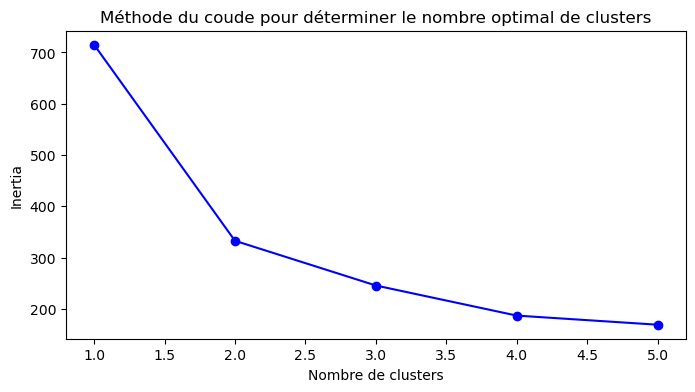

In [55]:
nb_clusters_optimal = determine_optimal_clusters(df_scaled, 5)

Graphiquement le nombre de clusters optimal est de 2

In [57]:
# clustering par méthode K-means 
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
table_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

clusters = table_cluster.groupby('Cluster').groups

for cluster, critiques in clusters.items():
    print(f"Cluster {cluster}: {list(critiques)}")

Cluster 0: ["L'Express", 'Télérama', 'Les Fiches du Cinéma', 'Les Inrockuptibles', 'Le Figaroscope', 'Cahiers du Cinéma', 'Le Monde', 'Sud Ouest', 'Le Figaro', 'La Voix du Nord', "L'Obs", 'Positif', 'TéléCinéObs', 'Mad Movies', "Chronic'art.com", 'Critikat.com', 'La Croix', 'TF1 News', "L'Humanité", 'Excessif', 'Charlie Hebdo', 'Ecran Large', 'Le Journal du Dimanche', 'Première', 'Libération', 'Studio Ciné Live', 'aVoir-aLire.com']
Cluster 1: ['Le Point', 'Bande à part', '20 Minutes', 'La Septième Obsession', 'Elle', 'Télé Loisirs', 'Les Echos', 'Marianne', 'Metro', 'Franceinfo Culture', 'Femme Actuelle', 'Ouest France', 'Paris Match', 'Télé 7 Jours', 'Télé 2 semaines', 'Le Parisien', 'Closer', 'CinemaTeaser', 'Le Dauphiné Libéré', 'Filmsactu', 'Public', 'LCI', 'Transfuge', 'CNews', 'Voici', "Dernières Nouvelles d'Alsace", "L'Ecran Fantastique", 'Culturopoing.com']


In [58]:
moyennes_par_groupe = table_cluster.groupby('Cluster').mean()
moyennes_par_groupe

,f,m,Action,Animation,Aventure,Biopic,Comédie,Comédie dramatique,Drame,Epouvante-horreur,Policier,Science Fiction,Thriller
Cluster,,,,,,,,,,,,,
0,3.068911,3.084413,2.750231,3.434282,3.049493,3.199741,2.980320,3.049453,3.236254,2.758021,3.121587,3.076978,2.904845
1,3.675774,3.675753,3.407442,3.907545,3.709551,3.771728,3.590023,3.704014,3.777041,3.434879,3.770269,3.555405,3.507247


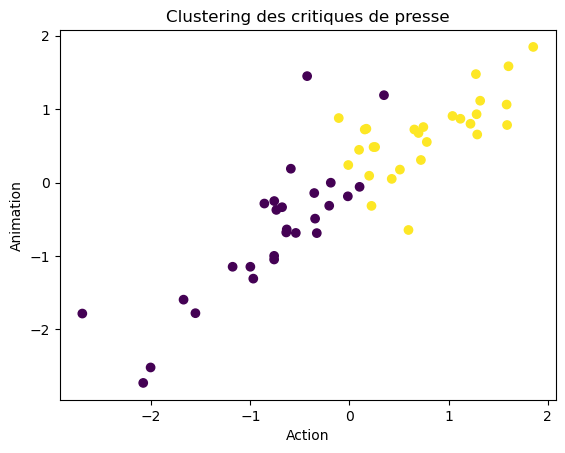

In [ ]:
import matplotlib.pyplot as plt

# Visualiser les clusters
plt.scatter(df_scaled[:, 4], df_scaled[:, 5], c=table_cluster['Cluster'], cmap='viridis')
plt.xlabel('Action')
plt.ylabel('Animation')
plt.title('Clustering des critiques de presse')
plt.show()

# plot pas très intéresant, juste conserver les valeurs de moyennes